# Create your model

RHEOS provide an extensive model library (see Models section). However, if you would like to use a model that has not already been implemented in RHEOS, you can quickly define your own model as described below. Note that currently RHEOS can only handle linear viscoelastic models. Therefore, any added model must satisfy this condition. 

The RheoModelClass constructor does not need to contain all moduli functions, depending on what variables are fitted and predicted down the line (relaxation modulus G for stress, creep function J for strain, and complex moduli Gp and Gpp for frequency domain data). As an example, we will assume that only the relaxation modulus is known.

In [4]:
using RHEOS
using PyPlot

In [5]:
PowerLawEmpirical =  RheoModelClass(
                        # Model name
                        name="power_empirical",
                        # Model parameters,
                        p = [:A, :α],
                        # Relaxation modulus
                        G = quote
                                A*t.^(-α)
                            end,
                        # Network
                        info= "Empirical model"
                        )


Model name: power_empirical

Free parameters: A and α
Empirical model

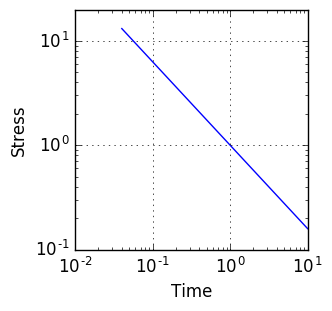

In [6]:
# generate timeline
dϵ=timeline()
# calculates strain data by applying a function of time
dϵ=strainfunction(dϵ,hstep())

# Fix model parameters
powermodel = RheoModel(PowerLawEmpirical, (A = 1, α = 0.8))

# Evaluate relaxation response
dpower = modelpredict(dϵ, powermodel)

fig, ax = subplots(1,1, figsize=(3,3));
ax.loglog(dpower.t,dpower.σ)
ax.set_xlabel("Time")
ax.set_ylabel("Stress")
ax.set_ylim(bottom =0.1, top = 20)
ax.grid("on")

In a similar way, it is possible to define a model with only creep modulus. In this case, only strain can be fitted/predicted. 